# MT2507 Mathematical Modelling: Computing Project 2022/23

## Instructions

- There is one helper worksheet associated with this project. You should work through this sheet before attempting the project.


- The project itself is worth 15% of your final grade in the module. There are 30 marks available.


- Submitting your project You should upload your work as a single .ipynb file to the relevant MySaint area as a single file by 2pm on Friday 24 March 2023 (end of Week 9).


- If you have been working on the server you will need to download the file from this server using Download as$>$Notebook in the File menu. The file must be downloaded as a Notebook. Your project must be self-contained such that it works when run in sequence (from top to bottom) by the marker.


- Help is available from staff in your computing lab session for each of Weeks 5-9 of the semester, excluding the February vacation. Make sure to use these well and do not leave all your questions to Week 9 (there are only so many things we can answer in the hour!).


- For each question three empty cells have been added below. This is an arbitrary number and you can add or delete cells as you wish. Some questions have been broken down into lettered parts for clarity, but you can answer each question in the cells below the question statement.


# Question 1: A Single Species Population Model

In a simple model to describe the growth of a population of *spruce budworms* the population density $u$ is controlled by logistic growth with a linear growth rate $r>0$ and a carrying capacity $q>0$. Furthermore, the population undergoes predation by other animals (e.g. birds). Predation usually saturates for large enough populations $u$. For small population densities $u$, the predators tend to seek food elsewhere and so the predation term drops more rapidly, as $u\rightarrow 0$. 

The population dynamics of the spruce budworm population over time can be captured by the ODE

\begin{equation}
\frac{du}{dt}=F(u)=ru\left(1-\frac{u}{q}\right)-\frac{u^2}{1+u^2}.
\tag{$\star$}
\end{equation}



## Part 1

For this question take the parameters $r=0.5$ and $q=8$.

**(a)** Make a plot of the function $F(u)$ for suitable $u$ that allows the number of roots of $F(u)=0$ to be found, and initial guesses for each root to be chosen. 

**(b)** Write a function which implements the Newton-Raphson method.  

The function should have the following arguments: 
- an initial guess,
- the function $F(u)$,
- the derivative of the function,
- suitable stopping condition(s).

The function should output the following for each iteration:
- the iterate number $n$, 
- the value of $x_n$,
- the difference $x_n-x_{n-1}$.  

**(c)** Use your function of part 1(b) to find all steady states of the ODE ($\star$) (for $u\ge0$) to an accuracy of four decimal places. 
 

<div style="text-align: right"> <b> [5 Marks]</b> </div>


In [1]:
r=0.5
q=8
def F(u):
    return r*u*(1-(u/q)) - ((u**2)/(1+u**2))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

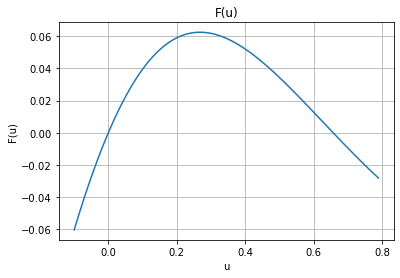

In [3]:
u2 = np.arange(-0.1,0.8,0.01)

plt.plot(u2,F(u2))
plt.xlabel('u')
plt.ylabel('F(u)')
plt.title('F(u)')

plt.grid(True)
#it looks as though there is a root near (0,0) and in the interval (0.6, 0.7)

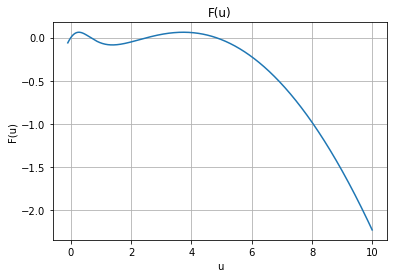

In [4]:
u2 = np.arange(-0.1,10,0.01)

plt.plot(u2,F(u2))
plt.xlabel('u')
plt.ylabel('F(u)')
plt.title('F(u)')

plt.grid(True)
#it looks as though there is also a root in the interval (4,6) and the interval (2,4)

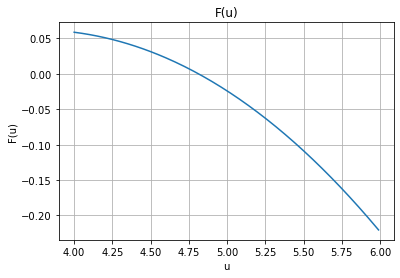

In [5]:
u2 = np.arange(4,6,0.01)

plt.plot(u2,F(u2))
plt.xlabel('u')
plt.ylabel('F(u)')
plt.title('F(u)')

plt.grid(True)
#root at approx x = 4.80

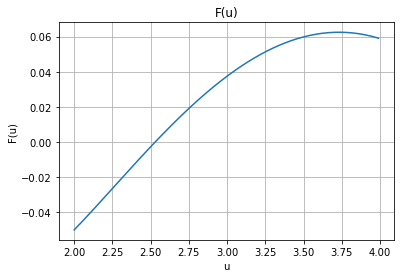

In [6]:
u2 = np.arange(2,4,0.01)

plt.plot(u2,F(u2))
plt.xlabel('u')
plt.ylabel('F(u)')
plt.title('F(u)')

plt.grid(True)
#root at approx x = 2.50

In [7]:
import sympy as sym
u = sym.symbols("u")

In [8]:
# went to computing session and was told that numbers weren't right with this method
#Fsym = r*u*(1-(u/q)) - ((u**2)/(1+u**2))
#sym.diff(Fsym, u)
#def dfdu(u):
   # return 2*(u**3)/((u**2 + 1)**2) - 0.125*u - 2*u/(u**2 +1) +0.5
    
#calculated derivative by hand:
def dfdu(u):
    return -2*u/(1+u**2)**2+ r*(1-u/q) - r*u/q

In [9]:
def NRroot(u_0, u,F,dfdu):
    u = u_0
    n=0
    for i in range(10):
        unew = u - F(u)/dfdu(u)
        print(unew)
        if unew == u:
            break
        difference = abs(unew - u)
        u=unew
        n= n+1
    return n, u, difference

In [10]:
NRroot(0.1, u, F, dfdu)

-0.03544435521508246
-0.002312641811171856
-1.1254376597409979e-05
-2.69141735824717e-10
-1.5392916131059208e-19
0.0
0.0


(6, 0.0, 1.5392916131059208e-19)

In [11]:
NRroot(0.65, u, F, dfdu)

0.6570695273641821
0.6570769172135102
0.6570769172228299
0.6570769172228297
0.6570769172228299
0.6570769172228297
0.6570769172228299
0.6570769172228297
0.6570769172228299
0.6570769172228297


(10, 0.6570769172228297, 2.220446049250313e-16)

In [12]:
NRroot(4.75, u, F, dfdu)

4.8157043876472345
4.813608645339758
4.813606502650571
4.81360650264833
4.813606502648331
4.813606502648331


(5, 4.813606502648331, 8.881784197001252e-16)

In [13]:
NRroot(2.5, u, F, dfdu)

2.529163314561544
2.5293165756174645
2.5293165801288384
2.5293165801288406
2.5293165801288393
2.529316580128838
2.5293165801288393
2.529316580128838
2.5293165801288393
2.529316580128838


(10, 2.529316580128838, 1.3322676295501878e-15)

## Part 2

Solve the ODE ($\star$) numerically using the fourth-order Runge-Kutta method for the four initial conditions: 
- $u(0) = 0.2$,

- $u(0) = 0.75$,

- $u(0) = 2.4$,

- $u(0) = 3$.

In each case you should choose an appropriate time step $h$ and a suitable total number of steps so that the solution obtained allows the long time behaviour of the solution to be known.

Use the numerical solutions found to produce a plot of the four solutions, with $u$ against $t$.

The result, and any subsequent explorations you choose to make, should allow you to assess the stability of the steady states found in Part 1. Explain your finding mathematically (you are not required to provide a biological explanation).

  <div style="text-align: right"> <b> [8 Marks]</b> </div>

In [14]:
# tn+1 = tn + h
#xn+1 = xn + (1/6)h(k1 + 2k2 + 2k3 + k4)
# k1 =f(xn,tn)
#k2 = f(xn+ 0.5*hk1, tn + 0.5h)
#k3 = f(xn+ 0.5*hk2, tn + 0.5h)
#k4 = f(xn+ hk3, tn + h)

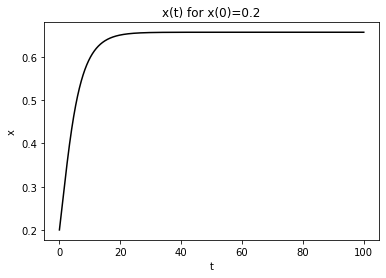

In [15]:
#for u(0) = 0.2
def f(x,t):
    return r*x*(1-(x/q)) - ((x**2)/(1+x**2))

def RK4(x, t, h, F2):
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1, t+0.5*h)
    k3 = f(x + 0.5*h*k2, t+ 0.5*h)
    k4 = f(x + h*k3, t + h)
    xnext = x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    #tnext = t + h
    return xnext#,tnext

h = 0.01
nsteps = 10000
x=0.2
t=0.0
xstore1 = []
tstore1 = []
xstore1.append(x)
tstore1.append(t)

for n in range(nsteps+1):
    x = RK4(x,t,h,f)
    t = t+h
    xstore1.append(x)
    tstore1.append(t)
    
plt.plot(tstore1,xstore1,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

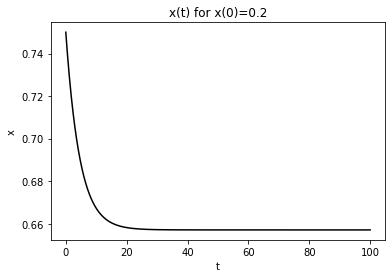

In [16]:
#for u(0) = 0.75
def f(x,t):
    return r*x*(1-(x/q)) - ((x**2)/(1+x**2))

def RK4(x, t, h, F2):
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1, t+0.5*h)
    k3 = f(x + 0.5*h*k2, t+ 0.5*h)
    k4 = f(x + h*k3, t + h)
    xnext = x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    #tnext = t + h
    return xnext#,tnext

h = 0.01
nsteps = 10000
x=0.75
t=0.0
xstore2 = []
tstore2 = []
xstore2.append(x)
tstore2.append(t)

for n in range(nsteps+1):
    x = RK4(x,t,h,f)
    t = t+h
    xstore2.append(x)
    tstore2.append(t)
    
plt.plot(tstore2,xstore2,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

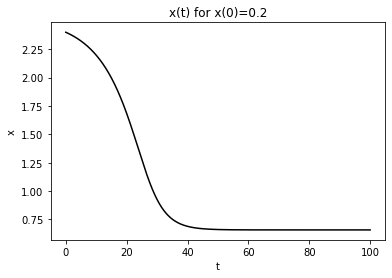

In [17]:
#for u(0) = 2.4
def f(x,t):
    return r*x*(1-(x/q)) - ((x**2)/(1+x**2))

def RK4(x, t, h, F2):
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1, t+0.5*h)
    k3 = f(x + 0.5*h*k2, t+ 0.5*h)
    k4 = f(x + h*k3, t + h)
    xnext = x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    #tnext = t + h
    return xnext#,tnext

h = 0.01
nsteps = 10000
x=2.4
t=0.0
xstore3 = []
tstore3 = []
xstore3.append(x)
tstore3.append(t)

for n in range(nsteps+1):
    x = RK4(x,t,h,f)
    t = t+h
    xstore3.append(x)
    tstore3.append(t)
    
plt.plot(tstore3,xstore3,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

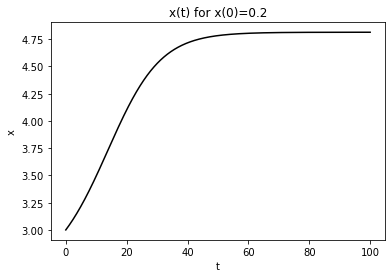

In [18]:
#for u(0) = 3
def f(x,t):
    return r*x*(1-(x/q)) - ((x**2)/(1+x**2))

def RK4(x, t, h, F2):
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1, t+0.5*h)
    k3 = f(x + 0.5*h*k2, t+ 0.5*h)
    k4 = f(x + h*k3, t + h)
    xnext = x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    #tnext = t + h
    return xnext#,tnext

h = 0.01
nsteps = 10000
x=3
t=0.0
xstore4 = []
tstore4 = []
xstore4.append(x)
tstore4.append(t)

for n in range(nsteps+1):
    x = RK4(x,t,h,f)
    t = t+h
    xstore4.append(x)
    tstore4.append(t)
    
plt.plot(tstore4,xstore4,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

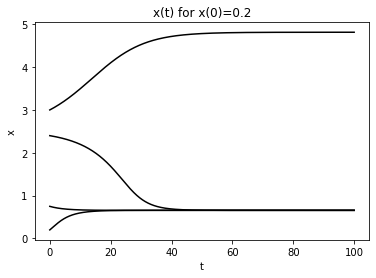

In [19]:
plt.plot(tstore1,xstore1,'k-')
plt.plot(tstore2,xstore2,'k-')
plt.plot(tstore3,xstore3,'k-')
plt.plot(tstore4,xstore4,'k-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) for x(0)=0.2')
plt.show()

At 0.65, the solution moves towards the steady state, making it stable.
At 4.8, the solution moves towards the steady state, making it stable/
At 2.5, the solution moves away from the steady state, making it unstable.
At 0, the solution moves away from the steady state, making it unstable

# Question 2: A  Two-Species Population Model

Consider the system of first-order ODEs modelling a predator-prey system given by

\begin{eqnarray}
\frac{dx}{dt} & = & x( a_1 -b_1 x +c_1 xy),  \\
&&\tag{$\star \star$}\\
\frac{dy}{dt} & = & y( a_2 -b_2 y -c_2 x^2) .
\end{eqnarray}

Here, all coefficients are assumed to be real and positive. We also assume that $x\ge 0$ and $y\ge 0$ for biological relevance. 

Three of the steady states of this system of equations can be determined analytically as:

* $(x_0,y_0) =(0,0)$,


* $\displaystyle{(x_0,y_0) =\left(0,\frac{a_2}{b_2}\right)}$,


* $\displaystyle (x_0,y_0) =\left( \frac{a_1}{b_1},0\right)$.


The fourth steady state satisfies the set of equations
\begin{eqnarray}
 a_1 -b_1 x +c_1 xy=0, \\
a_2 -b_2 y -c_2 x^2=0 ,
\end{eqnarray}
which can be solved numerically.

## Part 1

Using the Newton-Raphson method for functions of two variables, write a Python code to solve for the fourth steady state of ($\star \star$) numerically, using the parameter values  $a_1=0.8$, $a_2=0.7$, $b_1=b_2=2$ and $c_1=c_2=0.75$.

Use your code to find the fourth steady state, to four decimal places in both $x$ and $y$. Note, you should plot the contours $f(x,y)=g(x,y)=0$ for suitable $x$ and $y$ values to support your inital guess.
<div style="text-align: right"> <b> [5 Marks]</b> </div>

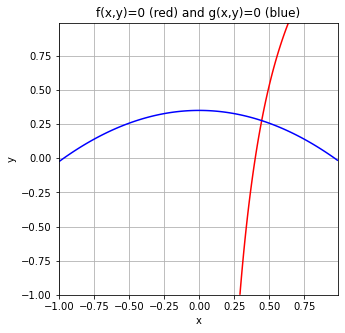

In [20]:
a1 = 0.8
a2 = 0.7
b1 = 2
b2 = 2
c1 = 0.75
c2 = 0.75

#plotting contours of f(x,y) = g(x,y) = 0
xp = np.arange(-1,1,0.01)
yp = np.arange(-1,1,0.01)
X,Y = np.meshgrid(xp,yp)

F = (a1 - b1*X +c1*X*Y)
G = (a2 - b2*Y- c2*X**2)

plt.figure(figsize=(5,5))
plt.contour(X,Y,F,levels=[0],colors='r')
plt.contour(X,Y,G,levels=[0],colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x,y)=0 (red) and g(x,y)=0 (blue)')
plt.grid(True);

#already found points are (0,0), (0, 0.35), (0.4, 0)

#the fourth steady state is in the range x = 0.25 to x = 0.5 and y=0.25 to y=0.5

In [21]:
a1 = 0.8
a2 = 0.7
b1 = 2
b2 = 2
c1 = 0.75
c2 = 0.75

def f(x,y):
    return (a1 - b1*x +c1*x*y)*x
def g(x,y):
    return (a2 - b2*y - c2*x**2)*y

In [22]:
#finding J^-1
def dfdx(x,y):
    return (-b1 + c1*y)*x +a1 - b1*x +c1*x*y
def dfdy(x,y):
    return c1*x**2
def dgdx(x,y):
    return -c2*2*x*y
def dgdy(x,y):
    return -b2*y + a2 - b2*y - c2*x**2

def Jinverse(x,y):
    J = np.array([[dfdx(x,y), dfdy(x,y)], [dgdx(x,y), dgdy(x,y)]])
    return np.linalg.inv(J)

def mat1(x,y):
    m = np.array([[f(x,y)], [g(x,y)]])
    return m

def Jinvtimesmat(x,y):
    mat = Jinverse(x,y) @ mat1(x,y)
    x = mat[0,0]
    y = mat[1,0]
    #print(x,y)
    return mat

def NR2D(x_0, y_0):
    n = 0
    x = x_0
    y = y_0
    
    for i in range(50):
        mat = np.array([[x],[y]])
        matnew = mat - Jinvtimesmat(x,y)
        print(matnew)
        if np.all(matnew == mat):
            break
        mat = matnew
        x = matnew[0,0]
        y = matnew[1,0]
        n = n+1
    return n, x, y

NR2D(0.30, 0.28)

[[0.58036318]
 [0.24917793]]
[[0.47194744]
 [0.2688684 ]]
[[0.44747983]
 [0.27507987]]
[[0.44606944]
 [0.27538383]]
[[0.4460648 ]
 [0.27538482]]
[[0.4460648 ]
 [0.27538482]]
[[0.4460648 ]
 [0.27538482]]
[[0.4460648 ]
 [0.27538482]]


(7, 0.4460648036409835, 0.275384821607274)

The fourth steady state is at x=0.4461, y=0.2754

## Part 2

Write a Python code to solve the system of ODEs numerically using the fourth-order Runge-Kutta method, for the parameter values given in Part 1.


Use and extend this code to produce a phase plane plot. The phase plane plot should show:

* the steady states,

* plots of example solutions produced using your ODE solver. 


When producing the plot choose appropriate initial conditions such that solution trajectories around the steady states are clear.


The plotted results should give an idea of the stability of the steady states found in Part 1. Using the eigenvalues of the Jacobian evaluated at each of the steady states formally characterise the nature of each of these critical points. 

**Note:** Code can be used to evaluate the Jacobian at each of the steady states, however the subsequent finding of the eigenvalues can be done analytically. This can either be typed up in a markdown cell or you can insert your handwritten working as an image (Edit>Insert Image) into a markdown cell.
<div style="text-align: right"> <b> [12 Marks]</b> </div>


In [23]:
a1 = 0.8
a2 = 0.7
b1 = 2
b2 = 2
c1 = 0.75
c2 = 0.75

def f(x,y):
    return (a1 - b1*x +c1*x*y)*x
def g(x,y):
    return (a2 - b2*y - c2*x**2)*y
def p(x,y,t):
    return np.array([f(x,y),g(x,y)])

def RK4second(x,y,t,h,f):
    k1 = p(x,y,t)
    k2 = p(x+h*k1[0]/2.0,y+h*k1[1]/2.0,t+h/2.0)
    k3 = p(x + 0.5*h*k2[0], y + 0.5*h*k2[1], t+ 0.5*h)
    k4 = p(x + h*k3[0], y + h*k3[0], t + h)
    xnext = x + (1/6)*h*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    ynext = y + (1/6)*h*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    return xnext, ynext

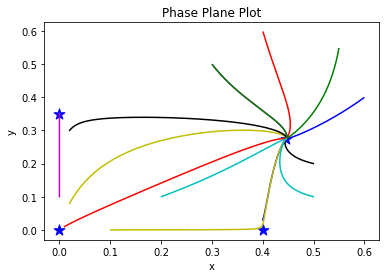

In [24]:
h = 0.01
nsteps = 10000
x=0.5
y = 0.2
t=0.0

x6 = 0.6
y6=0.4

x7 = 0.4
y7 = 0.6

xstore5 = []
ystore5 = []
xstore6 = []
ystore6 = []
xstore7 = []
ystore7 = []

for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore5.append(x)
    ystore5.append(y)
x = 0.6
y = 0.4
t = 0    
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore6.append(x)
    ystore6.append(y)

x = 0.4
y = 0.6
t = 0     
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore7.append(x)
    ystore7.append(y)

x = 0.55
y = 0.55
t = 0 
xstore8 = []
ystore8 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore8.append(x)
    ystore8.append(y)

x = 0.3
y = 0.5
t = 0 
xstore9 = []
ystore9 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore9.append(x)
    ystore9.append(y)
    
x = 0.02
y = 0.08
t = 0 
xstore10 = []
ystore10 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore10.append(x)
    ystore10.append(y)
    
x = 0.2
y = 0.1
t = 0 
xstore11 = []
ystore11 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore11.append(x)
    ystore11.append(y)
    
x = 0.01
y = 0.01
t = 0 
xstore12 = []
ystore12 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore12.append(x)
    ystore12.append(y)
    
x = 0.02
y = 0.3
t = 0 
xstore13 = []
ystore13 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore13.append(x)
    ystore13.append(y)
    
x = 0.4
y = 0.03
t = 0 
xstore14 = []
ystore14 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore14.append(x)
    ystore14.append(y)
x = 0.3
y = 0.5
t = 0 
xstore15 = []
ystore15 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore15.append(x)
    ystore15.append(y)
    
x = 0.0
y = 0.1
t = 0 
xstore16 = []
ystore16 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore16.append(x)
    ystore16.append(y)
x = 0.1
y = 0.0
t = 0 
xstore17 = []
ystore17 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore17.append(x)
    ystore17.append(y)
x = 0.5
y = 0.1
t = 0 
xstore18 = []
ystore18 = []
for n in range(nsteps+1):
    [x,y] = RK4second(x,y,t,h,p)
    t = t+h
    xstore18.append(x)
    ystore18.append(y)    

    
plt.plot(xstore5, ystore5, 'k-', xstore6, ystore6, 'b', xstore7, ystore7, 'r', xstore8, ystore8, 'g', xstore9, ystore9, 'm', xstore10, ystore10, 'y', xstore11, ystore11, 'c', xstore12, ystore12
         , 'r',xstore13, ystore13, 'k-', xstore14, ystore14, 'b', xstore15, ystore15, 'g', xstore16, ystore16, 'm', xstore17, ystore17, 'y', xstore18, ystore18, 'c' )

plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Plane Plot')

stable_x1 = 0
stable_y1 = 0
stable_x2 = 0
stable_y2 = a2/b2
stable_x3 = a1/b1
stable_y3 = 0
stable_x4 = 0.4461
stable_y4 = 0.2754

plt.scatter(stable_x1, stable_y1, marker="*", color="b", s=130, zorder=2, label="Stable")
plt.scatter(stable_x2, stable_y2, marker="*", color="b", s=130, zorder=2, label="Stable")
plt.scatter(stable_x3, stable_y3, marker="*", color="b", s=130, zorder=2, label="Stable")
plt.scatter(stable_x4, stable_y4, marker="*", color="b", s=130, zorder=2, label="Stable")


In [25]:
def Jcalc(x,y):
    J = np.array([[dfdx(x,y), dfdy(x,y)], [dgdx(x,y), dgdy(x,y)]])
    return J
print(Jcalc(stable_x1, stable_y1))
#both b and c spot are zero so no further calculation needed
lambda11 = 0.8
lambda12 = 0.7
#since 0 < lambda11 < lambda12 (0,0) is a unstable node

[[ 0.8  0. ]
 [-0.   0.7]]


In [26]:
print(Jcalc(stable_x2, stable_y2))
#both b and c spot are zero so no further calculation needed
lambda21 = 0.8
lambda22 = -0.7
#lambda22 < 0 < lambda21 so (0,a2/b2) is a saddle (unstable)

[[ 0.8  0. ]
 [-0.  -0.7]]


In [27]:
print(Jcalc(stable_x3, stable_y3))
#(-2 - x)(0.58-x) - (0.12*0) = 0
lambda31 = -0.8
lambda32 = 0.58 
#lambda31 < 0 < lambda32 so (a1/b1, 0) is a saddle point(unstable)

[[-0.8   0.12]
 [-0.    0.58]]


In [29]:
print(Jcalc(stable_x4, stable_y4))


#(-0.80011609-x)(-0.55085391-x)-(0.14925391)(-0.18428391) = 0
#simplifying:
#(-0.80011609-x)(-0.55085391-x)+0.027505094117588096 =0
#0.44074707663041185 +v2x + v1x +x**2 +0.027505094117588096 =0
#x**2 +1.3509699999999998*x +0.46825217074799996 = 0
bconst1 = 1.3509699999999998
cconst1 = 0.46825217074799996

#putting in quadratic formula to solve
lambda41 = (bconst1 + (((bconst1)**2 - 4*cconst1)**0.5))/2
lambda42 = (bconst1 - (((bconst1)**2 - 4*cconst1)**0.5))/2

#lambda41 is 0.6754849999999999+0.10941748271185968i
#lambda42 is 0.6754849999999999-0.10941748271185968i
#lambda21 and lambda22 are both complex numbers of the form a +/- bi where a>0 so (0.4461, 0.2754) is an unstable spiral

[[-0.80011609  0.14925391]
 [-0.18428391 -0.55085391]]
